In [23]:
import pandas as pd
import numpy as np
import os
import env
import acquire
import matplotlib.pyplot as plt
import seaborn as sns

print("Success")

Success


In [24]:
telco = acquire.get_telco()
telco['total_charges'] = pd.to_numeric(telco['total_charges'],errors='coerce')
des = telco.describe()
des

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,internet_service_type_id.1,payment_type_id.1,contract_type_id.1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,2283.300441,1.872923,2.315633,1.690473
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,2266.771362,0.737796,1.148907,0.833755
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,18.800000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,401.450000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1397.475000,2.000000,2.000000,1.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,3794.737500,2.000000,3.000000,2.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,8684.800000,3.000000,4.000000,3.000000


### Look for outliers in both total charages and tenure

In [25]:
IQR_tcharages = (des.iloc[6].iloc[6] - des.iloc[4].iloc[4])
Q3_tcharages = des.iloc[6].iloc[6]
Q1_tcharages = des.iloc[4].iloc[4]
little_outliers = Q1_tcharages - (1.5 * IQR_tcharages)
big_outliers = Q3_tcharages + (1.5 * IQR_tcharages)

telco['outlier_charges'] = telco['total_charges'] > big_outliers

In [26]:
IQR_tenure = (des.iloc[6].iloc[1] - des.iloc[4].iloc[1])
Q3_tenure = des.iloc[6].iloc[1]
Q1_tenure = des.iloc[4].iloc[1]
little_outliers = Q1_tenure - (1.5 * IQR_tenure)
big_outliers = Q3_tenure + (1.5 * IQR_tenure)

telco['outlier_tenure'] = telco['tenure'] > big_outliers
print(f"Percent of tenure outliers is {telco['outlier_tenure'].mean()}, \nPercent of total_charge outliers is {telco['outlier_charges'].mean()}")

Percent of tenure outliers is 0.0, 
Percent of total_charge outliers is 0.0


### Look at the raw data

In [27]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

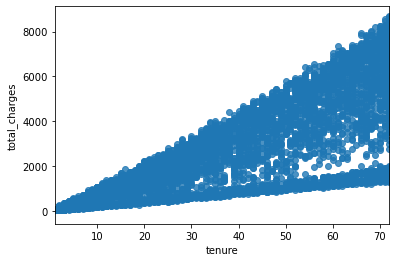

In [28]:
sns.regplot(x='tenure', y='total_charges', data=telco)

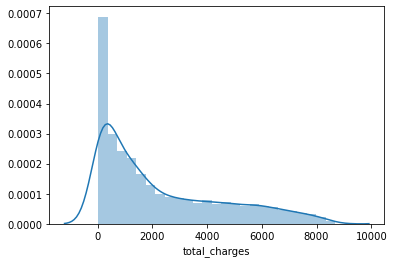

In [29]:
sns.distplot(telco['total_charges'])

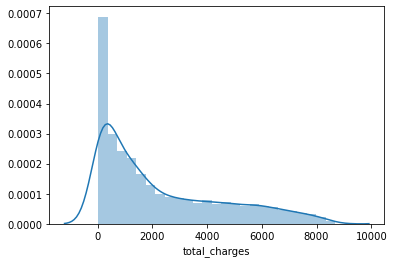

In [13]:
sns.distplot(telco['total_charges'])

In [30]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type_id.1',
       'internet_service_type', 'payment_type_id.1', 'payment_type',
       'contract_type_id.1', 'contract_type', 'outlier_charges',
       'outlier_tenure'],
      dtype='object')

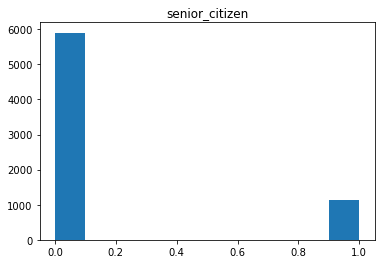

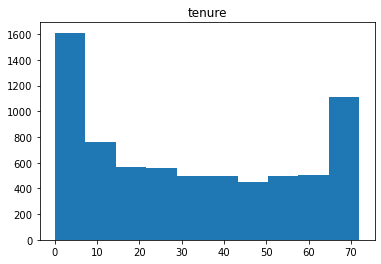

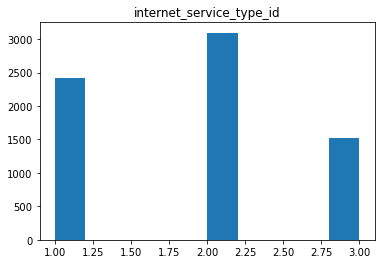

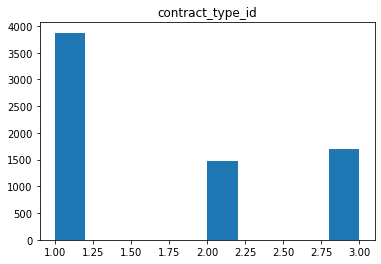

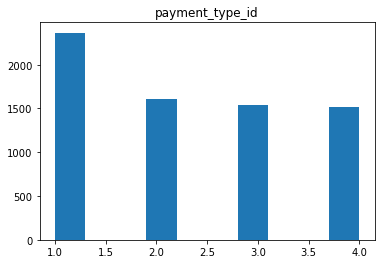

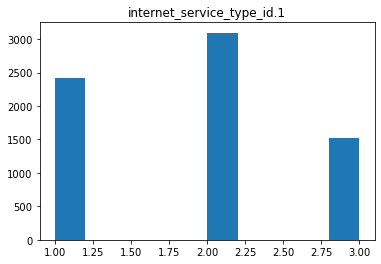

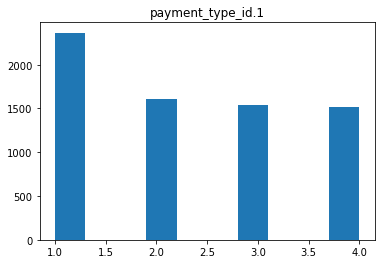

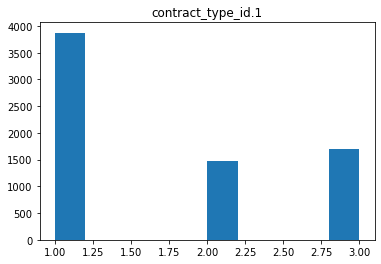

In [31]:
num_cols = telco.columns[[telco[col].dtype == 'int64' for col in telco.columns]]
for col in num_cols:
    plt.hist(telco[col])
    plt.title(col)
    plt.show()

In [32]:
import pandas as pd
import numpy as np
import acquire
from sklearn.model_selection import train_test_split

def prep_telco():
    telco = acquire.get_telco()
    telco.drop(columns=['internet_service_type_id.1', 'payment_type_id.1', 'contract_type_id.1', 
            'internet_service_type_id', 'payment_type_id', 'contract_type_id'], inplace = True)
    telco.replace({'churn': {'No': 0, 'Yes': 1}}, inplace = True)
    telco.dropna(inplace = True) 
    # Creates a tenue_year column 
    telco['tenure_year'] = round(telco['tenure']/12, 2)
    # creates a single_no_dependents column to see if being alone impacts churn 
    telco['single_no_dependents'] = (telco['partner'] == 'No') & (telco['dependents'] == 'No')
    # Crates a multiple phone line column to see if having phone service with multiple phone lines impacts churn
    telco['multiple_phone_lines'] = (telco['phone_service'] == 'Yes') & (telco['multiple_lines'] == 'Yes')
    # Creates a streaming column to look and see if a customer streams at all influences churn
    telco['streaming'] =  (telco['streaming_tv'] == 'Yes') | (telco['streaming_movies'] == 'Yes')
    # Creates a backedup and secured column to see if a customers who are security consicious impact churn
    telco['backedup_and_secured'] = (telco['online_security'] == 'Yes') & (telco['online_backup'] == 'Yes')
    # creates a has internet column to see if having internet at all impacts churn
    telco['has_internet'] = (telco['internet_service_type'] != 'None')
    # Turns all True and False/Yes and No values into 1s and 0s for easier analysis
    telco = telco.applymap(lambda x: 0 if x == False else x)
    telco = telco.applymap(lambda x: 1 if x == True else x)
    telco = telco.applymap(lambda x: 1 if x == 'Yes' else x)
    telco = telco.applymap(lambda x: 0 if x == 'No' else x)
    telco = telco.applymap(lambda x: 0 if x == 'No internet service' else x)
    telco = telco.applymap(lambda x: 0 if x == 'No phone service' else x)
    # Splits the df into train, validate, test sets for analysis
    train_validate, test = train_test_split(telco, test_size=.2, random_state=333, stratify=telco.churn)
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=333, 
                                       stratify=train_validate.churn)
    return train, validate, test, telco

### Runs the prep_telco function for testing purposes

In [33]:
train, validate, test, telco = prep_telco()

In [34]:
train.isnull().sum()

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
internet_service_type    0
payment_type             0
contract_type            0
tenure_year              0
single_no_dependents     0
multiple_phone_lines     0
streaming                0
backedup_and_secured     0
has_internet             0
dtype: int64

In [35]:
validate.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,internet_service_type,payment_type,contract_type,tenure_year,single_no_dependents,multiple_phone_lines,streaming,backedup_and_secured,has_internet
2017,3961-SXAXY,Male,0,0,0,1,1,0,0,0,...,0,DSL,Bank transfer (automatic),Month-to-month,0.08,1,0,0,0,1


In [36]:
test.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,internet_service_type,payment_type,contract_type,tenure_year,single_no_dependents,multiple_phone_lines,streaming,backedup_and_secured,has_internet
5534,6986-IXNDM,Male,0,0,0,14,1,0,0,0,...,0,Fiber optic,Electronic check,Month-to-month,1.17,1,0,1,0,1


In [37]:
telco.head(1)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,internet_service_type,payment_type,contract_type,tenure_year,single_no_dependents,multiple_phone_lines,streaming,backedup_and_secured,has_internet
0,0002-ORFBO,Female,0,1,1,9,1,0,0,1,...,0,DSL,Mailed check,One year,0.75,0,0,1,0,1


In [38]:
telco.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'internet_service_type', 'payment_type',
       'contract_type', 'tenure_year', 'single_no_dependents',
       'multiple_phone_lines', 'streaming', 'backedup_and_secured',
       'has_internet'],
      dtype='object')